#**Importing libraries**

In [ ]:

import pandas as pd
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Imports from Scikit learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder ## helps in encoding categorical variables
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder


#**Loading dataset**
- The dataset was obtained from kaggle dataset.
- It is collected from a lending club from years 2007- 2014 and the second one from 2016 to 2017. 
- The first one consists of 466,285 examples and 74 features. 
- The second dataset consists of 759,338 examples and 72 features.
- We will merge the two datasets to form one dataset. 
- The main purpose is to predict the probability of default of a loan by a given loan applicant.

In [ ]:
# Code to read csv file into Colaboratory from the google drive:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Loading the first dataset from years 2007-2014.

In [ ]:
link = 'https://drive.google.com/open?id=1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx'

In [ ]:
fluff, id = link.split('=')

print (id) 

1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx


In [ ]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1= pd.read_csv('Filename.csv')
print(data1.shape)
data1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(466285, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Loading the second dataset from 2016-2017

In [ ]:
link = 'https://drive.google.com/open?id=1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G'

In [ ]:
fluff, id = link.split('=')

print (id) 

1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data2 = pd.read_csv('Filename.csv')
print(data2.shape)
data2.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(759338, 72)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-17,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-85,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-17,77.08,Jan-18,Dec-17,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-17,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-92,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-17,360.95,Jan-18,Dec-17,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-17,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-02,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-17,209.01,Jan-18,Dec-17,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-17,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-07,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-17,652.91,Jan-18,Dec-17,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-17,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-02,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-17,431.73,Jan-18,Dec-17,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


### Merging the two datasets.

In [ ]:

### Merge data1 and data2
data3=pd.concat([data1,data2])
## The shape of the new data
print(data3.shape)
## Viewing the first five observations
data3.head() 

(1225623, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599.0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

## Checking the columns in the data

print(list(data3.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

- The target variable we are using for prediction is the loan_status

In [ ]:
## The number of examples under each category in the target variable (loan status)

data3['loan_status'].value_counts()

Current                                                789749
Fully Paid                                             315457
Charged Off                                             79672
Late (31-120 days)                                      22254
In Grace Period                                          9780
Late (16-30 days)                                        5094
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                   868
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Since we are interested in predicting the probability of default we will consider only those loans that are fully paid and those that are charged off and drop all the other categories of the loan_status.

In [ ]:
## Remaining with the fully paid loan and the charged off loan
Data = data3.loc[data3['loan_status'].isin(['Fully Paid', 'Charged Off'])]
Data.shape

(395129, 74)

#**Preprocessing**
- Check all the columns that have missing and remove all those with 50% missing values.
- Remove all the redundant columns that are not available during loan application.
- Perform label encoding to all the columns that are categorical.
- Deal with the missings by replacing them with the mean of the column.
- Perform one hot encoding on the coded columns.
- Perform standardization.

In [ ]:
## Checking whether there is any missing value

Data.isnull().sum().values.any()

True

In [ ]:
## Checking how many columns have missing values

Data.columns[data3.isnull().any()]


Index(['member_id', 'emp_title', 'emp_length', 'annual_inc', 'url', 'desc',
       'title', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [ ]:
# helps in providing libraries helpful for visualization of missing values

import missingno as msno 
%matplotlib inline

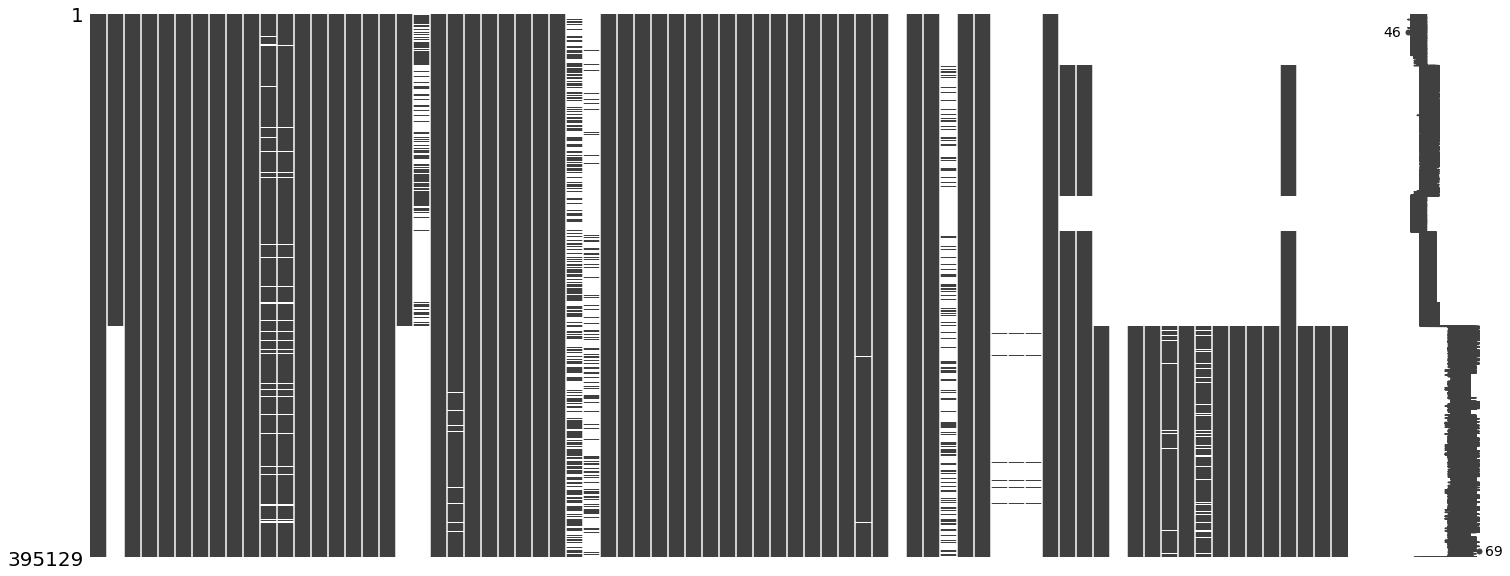

In [ ]:
## Visualizing the missing in the dataset
msno.matrix(Data)

- The white lines/spaces represent the missing values in the data. We will do this using two steps:


1.   Removing all the columns with 50% missing values.
2.   Remove all the redundant columns.






In [ ]:
## Dropping all the columns that have 50% missing values
Data.dropna(thresh = Data.shape[0]*0.5, how = 'all', axis = 'columns', inplace = True)
print(Data.shape)

(395129, 52)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
### Checking the 64 columns remaining 
Data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

We are going to remove all those features that are available once one has been given the loan and so they are not important during loan application.

In [ ]:
#drop all unnecessary columns/redundant columns

Data.drop(columns = ['id', 'sub_grade', 'emp_title', 'title', 'funded_amnt','url','member_id', 'funded_amnt_inv',

                          'zip_code', 'recoveries', 'collection_recovery_fee','inq_last_6mths',

                          'total_rec_prncp', 'total_rec_late_fee','addr_state','last_pymnt_d','earliest_cr_line',
                     
                     'last_credit_pull_d','total_rev_hi_lim','tot_cur_bal','tot_coll_amt','delinq_2yrs','revol_bal',
                     
                     'revol_util','out_prncp','out_prncp_inv','policy_code','total_pymnt','total_pymnt_inv',
                     
                     'total_rec_int','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','emp_length',], inplace = True)

print(Data.shape)

(395129, 18)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


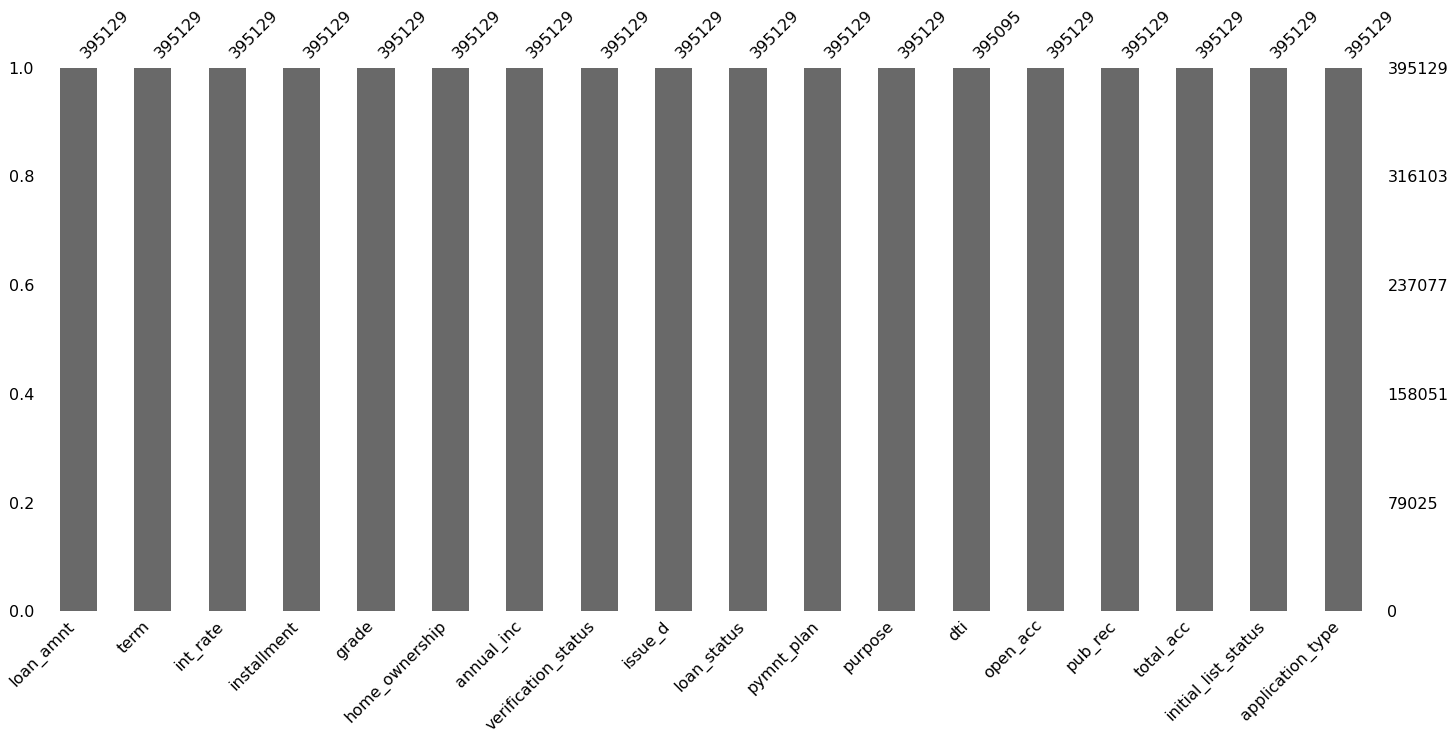

In [ ]:
## Visualizing using a bar plot after removing redundant columns and also those with above 50% missing value
## Shows the number of non-missing values in the columns
msno.bar(Data)

In [ ]:

## Checking whether we still have missing values
Data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
purpose                 0
dti                    34
open_acc                0
pub_rec                 0
total_acc               0
initial_list_status     0
application_type        0
dtype: int64

In [ ]:
## checking the data types of the columns
Data.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
purpose                 object
dti                    float64
open_acc               float64
pub_rec                float64
total_acc              float64
initial_list_status     object
application_type        object
dtype: object

#**Exploratory Descriptive Analysis**
- We will explore the remaining columns by performing summary statistics and visualization for better understanding of the data.



###1.   **Loan Amount**




In [ ]:
Data['loan_amnt'].describe()

count    395129.000000
mean      13935.696633
std        8539.225985
min         500.000000
25%        7250.000000
50%       12000.000000
75%       19675.000000
max       40000.000000
Name: loan_amnt, dtype: float64

From above we see that the loan applied for ranges from 500 dollars to 40,000 dollars.

In [ ]:
def visualization_plots(feature_name, feature_full_name, continuous):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,2), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(Data.loc[Data[feature_name].notnull(), feature_name], kde=False, ax=ax1)
    else:
        sns.countplot(Data[feature_name], order=sorted(Data[feature_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(feature_full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(feature_full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=feature_name, y='loan_status', data=Data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(feature_full_name + ' by Loan Status')
    else:
        charge_off_rates = Data.groupby(feature_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + feature_full_name)
    ax2.set_xlabel(feature_full_name)
    
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


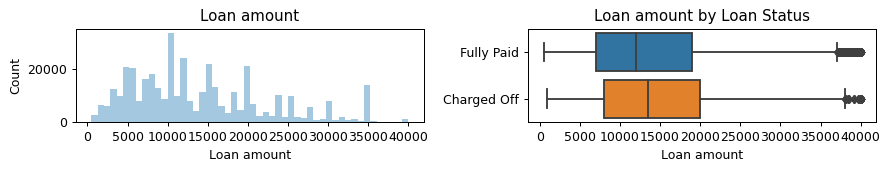

In [ ]:
visualization_plots('loan_amnt', 'Loan amount', continuous=True)

In [ ]:
Data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,79672.0,15065.706898,8776.004110,900.0,8000.0,13500.0,20000.0,40000.0
Fully Paid,315457.0,13650.300596,8454.537464,500.0,7000.0,12000.0,19000.0,40000.0


- From the boxplot we see that those who are charged off mostly take higher loans compared to those who pay in full. This is seen better in the summary statistics below the plots.




###2.   **Term**




In [ ]:
## To make sure that there is no space between the string in the term category i.e "36 months" and "36 months "
Data['term'] = Data['term'].str.replace(" ","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


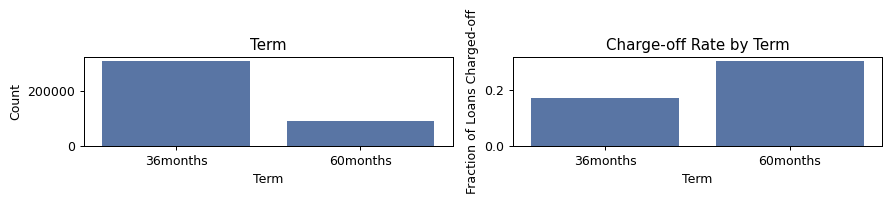

In [ ]:
visualization_plots('term', 'Term', continuous=False)

- We see that most of the loan applied for is for a term of 36 months and most of those that are charged off are those that are taken for a term of 60 months.



##3. **Interest rate** 




In [ ]:
Data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,79672.0,16.140580,4.881872,5.32,12.79,15.61,19.2,30.99
Fully Paid,315457.0,13.217193,4.634891,5.32,9.75,12.98,15.8,30.99


- The charged off loans are mostly charged very high interest rate.



##4. **Installments**  




In [ ]:
Data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,79672.0,462.912515,268.806330,21.62,269.09,401.39,604.63,1569.11
Fully Paid,315457.0,422.542295,258.874512,15.69,232.91,361.48,557.38,1714.54


- The charged off loans are again very high installment compared to those loans that end up been fully paid.

In [ ]:
## Identifying all the categorical features in the data
categorical_list=Data.select_dtypes(include="object").columns
print(categorical_list)

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')


- We will first do label encoding on the target variable (loan status) and label it as the target and then drop it from the main data to avoid it from been standardized.

In [ ]:
## Performing label encoding on the target variable and renaming the column from loan_status to target_variable
Data['target_variable']= (Data['loan_status'] == 'Charged Off').apply(np.uint8)
Data.drop('loan_status', axis=1, inplace=True)
Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,open_acc,pub_rec,total_acc,initial_list_status,application_type,target_variable
0,5000,36months,10.65,162.87,B,RENT,24000.0,Verified,Dec-11,n,credit_card,27.65,3.0,0.0,9.0,f,INDIVIDUAL,0
1,2500,60months,15.27,59.83,C,RENT,30000.0,Source Verified,Dec-11,n,car,1.00,3.0,0.0,4.0,f,INDIVIDUAL,1
2,2400,36months,15.96,84.33,C,RENT,12252.0,Not Verified,Dec-11,n,small_business,8.72,2.0,0.0,10.0,f,INDIVIDUAL,0
3,10000,36months,13.49,339.31,C,RENT,49200.0,Source Verified,Dec-11,n,other,20.00,10.0,0.0,37.0,f,INDIVIDUAL,0
5,5000,36months,7.90,156.46,A,RENT,36000.0,Source Verified,Dec-11,n,wedding,11.20,9.0,0.0,12.0,f,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759324,5000,36months,15.41,174.34,D,MORTGAGE,60000.0,Source Verified,Jan-16,n,debt_consolidation,32.34,14.0,0.0,29.0,w,Individual,1
759328,6000,36months,26.77,244.22,G,RENT,20000.0,Verified,Jan-16,n,debt_consolidation,29.11,20.0,0.0,31.0,w,Individual,1
759329,6000,36months,13.67,204.11,C,RENT,85000.0,Verified,Jan-16,n,moving,2.85,4.0,1.0,8.0,f,Individual,0
759330,24100,60months,18.49,618.43,E,RENT,65000.0,Source Verified,Jan-16,n,debt_consolidation,17.54,7.0,0.0,16.0,w,Individual,1


In [ ]:
## Creating a dataframe of the target variable 
Targ=pd.concat([Data['issue_d'],Data['target_variable']],axis=1)
Targ

,issue_d,target_variable
0,Dec-11,0
1,Dec-11,1
2,Dec-11,0
3,Dec-11,0
5,Dec-11,0
...,...,...
759324,Jan-16,1
759328,Jan-16,1
759329,Jan-16,0
759330,Jan-16,1


In [ ]:
##The columns we are using
Data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'initial_list_status', 'application_type', 'target_variable'],
      dtype='object')

In [ ]:
## All the features in the dataset that are numerical
features=['loan_amnt',  'int_rate', 'installment',
        'annual_inc', 
        'dti','open_acc', 'pub_rec', 'total_acc']
    
numerical_features=pd.DataFrame(Data[features])
numerical_features.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,total_acc
0,5000,10.65,162.87,24000.0,27.65,3.0,0.0,9.0
1,2500,15.27,59.83,30000.0,1.00,3.0,0.0,4.0
2,2400,15.96,84.33,12252.0,8.72,2.0,0.0,10.0
3,10000,13.49,339.31,49200.0,20.00,10.0,0.0,37.0
5,5000,7.90,156.46,36000.0,11.20,9.0,0.0,12.0


In [ ]:
## Filling all the missing values in the numerical features
numerical_features.fillna(numerical_features.mean(),inplace = True)
print("Current shape of dataset :",numerical_features.shape)

Current shape of dataset : (395129, 8)


In [ ]:
numerical_features.isnull().sum().values.any() ## checking whether there is any missing

False

In [ ]:
## Standardizing the loan amount column 
numerical_features['loanAmt'] = StandardScaler().fit_transform(np.array(numerical_features['loan_amnt']).reshape(-1, 1)) 
  
# drop the loan amount column as they are not relevant for prediction purpose  
numerical_features = numerical_features.drop(['loan_amnt'], axis = 1)
numerical_features


,int_rate,installment,annual_inc,dti,open_acc,pub_rec,total_acc,loanAmt
0,10.65,162.87,24000.0,27.65,3.0,0.0,9.0,-1.046431
1,15.27,59.83,30000.0,1.00,3.0,0.0,4.0,-1.339198
2,15.96,84.33,12252.0,8.72,2.0,0.0,10.0,-1.350908
3,13.49,339.31,49200.0,20.00,10.0,0.0,37.0,-0.460897
5,7.90,156.46,36000.0,11.20,9.0,0.0,12.0,-1.046431
...,...,...,...,...,...,...,...,...
759324,15.41,174.34,60000.0,32.34,14.0,0.0,29.0,-1.046431
759328,26.77,244.22,20000.0,29.11,20.0,0.0,31.0,-0.929324
759329,13.67,204.11,85000.0,2.85,4.0,1.0,8.0,-0.929324
759330,18.49,618.43,65000.0,17.54,7.0,0.0,16.0,1.190309


##**Standardization**
- We will standardize the numerical variables.

In [ ]:
## Standardizing the amount column 
numerical_features['interest'] = StandardScaler().fit_transform(np.array(numerical_features['int_rate']).reshape(-1, 1)) 
numerical_features['installments'] = StandardScaler().fit_transform(np.array(numerical_features['installment']).reshape(-1, 1))
numerical_features['income'] = StandardScaler().fit_transform(np.array(numerical_features['annual_inc']).reshape(-1, 1))
numerical_features['dti_ratio'] = StandardScaler().fit_transform(np.array(numerical_features['dti']).reshape(-1, 1))
numerical_features['open_accts'] = StandardScaler().fit_transform(np.array(numerical_features['open_acc']).reshape(-1, 1))
numerical_features['Pub_rec'] = StandardScaler().fit_transform(np.array(numerical_features['pub_rec']).reshape(-1, 1))
numerical_features['Total_acc'] = StandardScaler().fit_transform(np.array(numerical_features['total_acc']).reshape(-1, 1))

# drop Time and Amount columns as they are not relevant for prediction purpose  
droped=['int_rate', 'installment',
        'annual_inc', 'total_acc',
        'dti','open_acc', 'pub_rec' ]
numerical_features = numerical_features.drop(droped,axis = 1)
                                             
numerical_features

,loanAmt,interest,installments,income,dti_ratio,open_accts,Pub_rec,Total_acc
0,-1.046431,-0.653511,-1.024495,-0.775782,1.107985,-1.581350,-0.354082,-1.351373
1,-1.339198,0.302952,-1.418666,-0.685108,-1.749352,-1.581350,-0.354082,-1.769881
2,-1.350908,0.445800,-1.324943,-0.953322,-0.921636,-1.771689,-0.354082,-1.267672
3,-0.460897,-0.065555,-0.349538,-0.394951,0.287774,-0.248977,-0.354082,0.992271
5,-1.046431,-1.222834,-1.049016,-0.594434,-0.655737,-0.439316,-0.354082,-1.100269
...,...,...,...,...,...,...,...,...
759324,-1.046431,0.331936,-0.980617,-0.231737,1.610834,0.512380,-0.354082,0.322658
759328,-0.929324,2.683757,-0.713297,-0.836231,1.264522,1.654414,-0.354082,0.490062
759329,-0.929324,-0.028290,-0.866735,0.146071,-1.551001,-1.391011,1.521210,-1.435075
759330,1.190309,0.969577,0.718214,-0.156176,0.024020,-0.819994,-0.354082,-0.765462


##**One hot encoding** 
- We are going to first create a new dataframe that consists of the catagorical variables and then perform one hot encoding on the categorical variables by creating dummy variables using pandas.

In [ ]:
data=pd.concat([Data['term'], Data['purpose'],Data['grade'],Data['home_ownership'],
              
              Data['verification_status'],Data['pymnt_plan'],Data['initial_list_status']],axis=1)

data



,term,purpose,grade,home_ownership,verification_status,pymnt_plan,initial_list_status
0,36months,credit_card,B,RENT,Verified,n,f
1,60months,car,C,RENT,Source Verified,n,f
2,36months,small_business,C,RENT,Not Verified,n,f
3,36months,other,C,RENT,Source Verified,n,f
5,36months,wedding,A,RENT,Source Verified,n,f
...,...,...,...,...,...,...,...
759324,36months,debt_consolidation,D,MORTGAGE,Source Verified,n,w
759328,36months,debt_consolidation,G,RENT,Verified,n,w
759329,36months,moving,C,RENT,Verified,n,f
759330,60months,debt_consolidation,E,RENT,Source Verified,n,w


In [ ]:
#new = data["term"].replace("36_months ", "36_months").copy()
data['term'] = data['term'].str.replace(" ","")


In [ ]:
## One hot encoding using pandas 
Daata=pd.get_dummies(data)
Daata

,term_36months,term_60months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759324,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
759328,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1
759329,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
759330,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


## Merging the newly formed dummy variables and the standardized numerical variables.

In [ ]:
loan_data=pd.concat([numerical_features,Daata],axis=1)
loan_data

,loanAmt,interest,installments,income,dti_ratio,open_accts,Pub_rec,Total_acc,term_36months,term_60months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w
0,-1.046431,-0.653511,-1.024495,-0.775782,1.107985,-1.581350,-0.354082,-1.351373,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,-1.339198,0.302952,-1.418666,-0.685108,-1.749352,-1.581350,-0.354082,-1.769881,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,-1.350908,0.445800,-1.324943,-0.953322,-0.921636,-1.771689,-0.354082,-1.267672,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
3,-0.460897,-0.065555,-0.349538,-0.394951,0.287774,-0.248977,-0.354082,0.992271,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
5,-1.046431,-1.222834,-1.049016,-0.594434,-0.655737,-0.439316,-0.354082,-1.100269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759324,-1.046431,0.331936,-0.980617,-0.231737,1.610834,0.512380,-0.354082,0.322658,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
759328,-0.929324,2.683757,-0.713297,-0.836231,1.264522,1.654414,-0.354082,0.490062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1
759329,-0.929324,-0.028290,-0.866735,0.146071,-1.551001,-1.391011,1.521210,-1.435075,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
759330,1.190309,0.969577,0.718214,-0.156176,0.024020,-0.819994,-0.354082,-0.765462,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


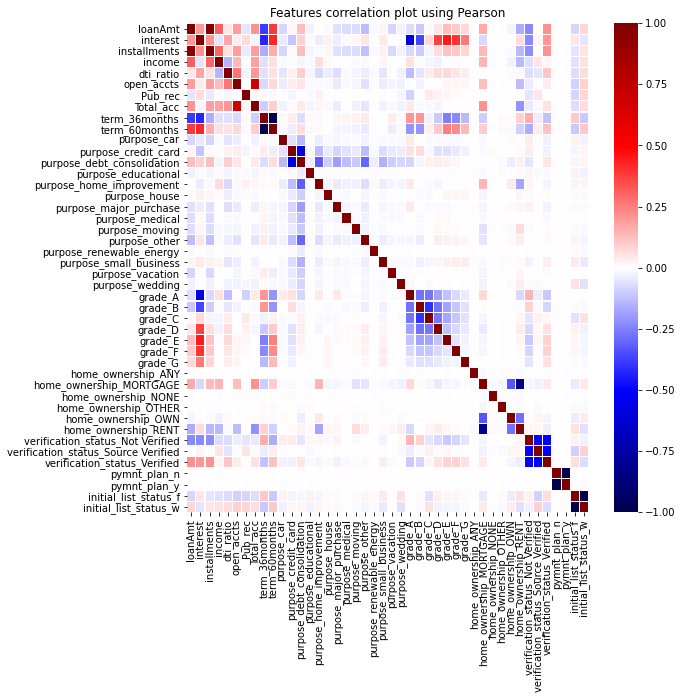

In [ ]:
## Correlation matrix to show how the features are correlated as this will affect how the model performs

plt.figure(figsize = (9,9))
plt.title('Features correlation plot using Pearson')
corr = loan_data.corr()## generating the correlation matrix
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.show()


### The number of columns increased from 18 to 44 due to the dummy variables created after one hot encoding.

In [ ]:
### Merging the target variable and the predictor variables
Loan_data=pd.concat([loan_data,Targ],axis=1)
Loan_data

,loanAmt,interest,installments,income,dti_ratio,open_accts,Pub_rec,Total_acc,term_36months,term_60months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,issue_d,target_variable
0,-1.046431,-0.653511,-1.024495,-0.775782,1.107985,-1.581350,-0.354082,-1.351373,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,Dec-11,0
1,-1.339198,0.302952,-1.418666,-0.685108,-1.749352,-1.581350,-0.354082,-1.769881,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,Dec-11,1
2,-1.350908,0.445800,-1.324943,-0.953322,-0.921636,-1.771689,-0.354082,-1.267672,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,Dec-11,0
3,-0.460897,-0.065555,-0.349538,-0.394951,0.287774,-0.248977,-0.354082,0.992271,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,Dec-11,0
5,-1.046431,-1.222834,-1.049016,-0.594434,-0.655737,-0.439316,-0.354082,-1.100269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,Dec-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759324,-1.046431,0.331936,-0.980617,-0.231737,1.610834,0.512380,-0.354082,0.322658,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,Jan-16,1
759328,-0.929324,2.683757,-0.713297,-0.836231,1.264522,1.654414,-0.354082,0.490062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,Jan-16,1
759329,-0.929324,-0.028290,-0.866735,0.146071,-1.551001,-1.391011,1.521210,-1.435075,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,Jan-16,0
759330,1.190309,0.969577,0.718214,-0.156176,0.024020,-0.819994,-0.354082,-0.765462,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,Jan-16,1


##**Spliting the dataset into training and testing set.**
- We will use the issue date to split the dataset such that the testing set contains the latest years when the loan was issued but we will drop this column since it is not available during loan application.
- We will first change the issue date into datetime object.
- Then split the training set to be 80% of the data.


In [ ]:
### Converting the date to be in the format mm-yyyy from mm-yy
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('07','2007')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('08','2008')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('09','2009')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('10','2010')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('11','2011')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('12','2012')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('13','2013')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('14','2014')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('16','2016')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('17','2017')

In [ ]:
## We will convert the date such that every month will start by the first day of the month
#from datetime import date
Loan_data['issuedate']=pd.to_datetime(Loan_data['issue_d'])
Loan_data.drop('issue_d', axis=1, inplace=True)

In [ ]:
## viewing the first 10 examples
Loan_data['issuedate'].sample(10)

136084   2013-05-01
227073   2012-02-01
199209   2017-01-01
498762   2016-04-01
4582     2011-10-01
632235   2016-03-01
124648   2013-07-01
332849   2014-07-01
661975   2016-03-01
243114   2016-08-01
Name: issuedate, dtype: datetime64[ns]

In [ ]:
## we now understand better how the column issue date looks like
Loan_data['issuedate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  395129
unique                    112
top       2016-03-01 00:00:00
freq                    22914
first     2007-06-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

- In the data we see that the month of March on 2016 many loan applicants were issued with a loan than any other year.
- The first loan was issued on June 2006 and the recent one was issued on September 2017.

In [ ]:
## Spliting the data into training and testing set
train_data = Loan_data.loc[Loan_data['issuedate'] <  Loan_data['issuedate'].quantile(0.8)]
test_data =  Loan_data.loc[Loan_data['issuedate']>= Loan_data['issuedate'].quantile(0.8)]
print('The shape of the training set is:',train_data.shape)
print('The shape of the testing set is:',test_data.shape)

The shape of the training set is: (311251, 46)
The shape of the testing set is: (83878, 46)


In [ ]:
## Describing the column issuedate under the training data set
train_data['issuedate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  311251
unique                     97
top       2016-03-01 00:00:00
freq                    22914
first     2007-06-01 00:00:00
last      2016-06-01 00:00:00
Name: issuedate, dtype: object

- From above we see that the training set contains data from June 2007 to June 2016.

In [ ]:
test_data['issuedate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   83878
unique                     15
top       2016-07-01 00:00:00
freq                    10825
first     2016-07-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

- We will test the model using data from July 2016 to September 2017. 

In [ ]:
## Droping the issuedate column since it is not available during loan application
train_data.drop('issuedate', axis=1, inplace=True)
test_data.drop('issuedate', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#**Model creation**
- We will first assign the predictor variables and the predicted one.
- We will create a model without performing any resampling technique and see how well the model predicts new data.
- We will then perform resampling on our training set by creating synthetic instances using SMOTE.
- The model is evaluated using precision, recall and F1 score. 

In [ ]:
### Distinguishing between the predictor variables and the predicted variable
y_train=train_data.target_variable
y_test=test_data.target_variable
print('The shape of the train set for the predicted is:',y_train.shape)
print('The shape of the train set for the predicted is:',y_test.shape)

The shape of the train set for the predicted is: (311251,)
The shape of the train set for the predicted is: (83878,)


In [ ]:
x_train = train_data.drop('target_variable',axis=1)
x_test = test_data.drop('target_variable',axis=1)
print('The shape of the train set for the predictor is:',x_train.shape)
print('The shape of the train set for the predictor is:',x_test.shape)

The shape of the train set for the predictor is: (311251, 44)
The shape of the train set for the predictor is: (83878, 44)


##**Random Forest**

In [ ]:
## we create a model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier().fit(x_train, y_train.ravel())

Rf_pred = Rf.predict(x_test)


In [ ]:
## evaluating the model
from sklearn.metrics import classification_report
print(classification_report(y_test, Rf_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     69394
           1       0.37      0.14      0.21     14484

    accuracy                           0.81     83878
   macro avg       0.60      0.55      0.55     83878
weighted avg       0.76      0.81      0.77     83878



##**Random Forest with resampling technique(SMOTE)**

In [ ]:
## Creating synthetics instances using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
Smt = SMOTE()
x_train_smt, y_train_smt = Smt.fit_resample(x_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
## fitting a model using random forest after performing resampling the data using SMOTE
smt_Rf = RandomForestClassifier().fit(x_train_smt, y_train_smt.ravel())

smt_Rf_pred = smt_Rf.predict(x_test)

In [ ]:
### Evaluating the model after resampling the data
print(classification_report(y_test, smt_Rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     69394
           1       0.27      0.35      0.31     14484

    accuracy                           0.73     83878
   macro avg       0.57      0.58      0.57     83878
weighted avg       0.76      0.73      0.74     83878



In [ ]:
preds = smt_Rf.predict_proba(x_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df

,prob_default
0,0.21
1,0.64
2,0.14
3,0.39
4,0.27
...,...
83873,0.30
83874,0.14
83875,0.52
83876,0.24


##**Logistic regression**